<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical features</a></span><ul class="toc-item"><li><span><a href="#Count-unique-values-in-each-categorical-feature" data-toc-modified-id="Count-unique-values-in-each-categorical-feature-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Count unique values in each categorical feature</a></span></li></ul></li><li><span><a href="#Datetime-feature" data-toc-modified-id="Datetime-feature-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Datetime feature</a></span></li><li><span><a href="#Target-feature" data-toc-modified-id="Target-feature-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Target feature</a></span></li></ul></li></ul></div>

## Load

Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

Data

In [13]:
!du -hs ../downloads/*.csv

187M	../downloads/sample_submission.csv
830M	../downloads/test.csv
7.0G	../downloads/train.csv
3.9M	../downloads/train_sample.csv


In [2]:
train_sample = pd.read_csv('../downloads/train_sample.csv')

In [3]:
test = pd.read_csv('../downloads/test.csv')

## Explore

In [4]:
train_sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [5]:
test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


### Missing values

In [5]:
train_sample.isnull().mean()

ip                 0.00000
app                0.00000
device             0.00000
os                 0.00000
channel            0.00000
click_time         0.00000
attributed_time    0.99773
is_attributed      0.00000
dtype: float64

In [6]:
test.isnull().mean()

click_id      0.0
ip            0.0
app           0.0
device        0.0
os            0.0
channel       0.0
click_time    0.0
dtype: float64

No missing values to worry about.

### Categorical features

In [7]:
cat_cols = ['ip', 'app', 'device', 'os', 'channel']

#### Count unique values in each categorical feature

In [29]:
from helper.plotting import plot_df_nunique

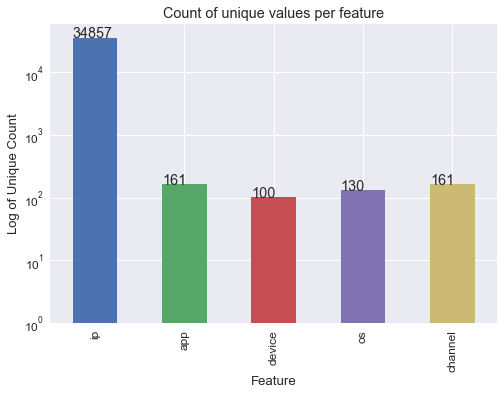

In [31]:
plot_df_nunique(train_sample, cat_cols, log=True)

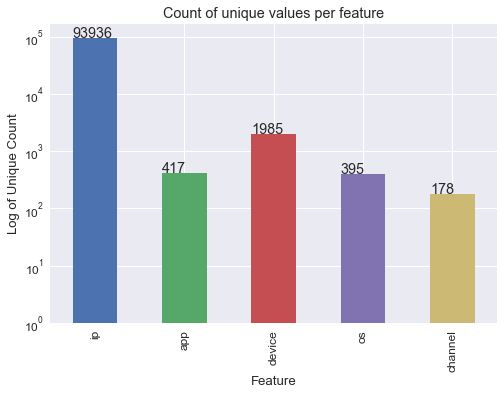

In [32]:
plot_df_nunique(test, cat_cols, log=True)

### Datetime feature

In [43]:
train_sample['click_time'] = pd.to_datetime(train_sample.click_time)

In [44]:
train_sample['click_hour'] = train_sample['click_time'].dt.hour

[Text(0,0.5,'# clicks'), Text(0.5,0,'Hour of day')]

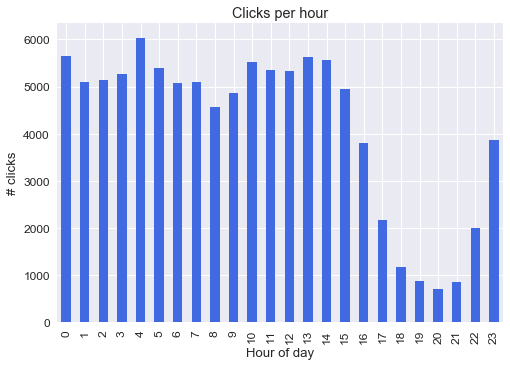

In [59]:
clicks_by_hour = train_sample['click_hour'].value_counts().sort_index()
ax = clicks_by_hour.plot.bar(color=['royalblue'])
ax.set_title('Clicks per hour')
ax.set(xlabel='Hour of day', ylabel='# clicks')

In [57]:
attributed = train_sample[train_sample.is_attributed==1]

[Text(0,0.5,'# clicks'), Text(0.5,0,'Hour of day')]

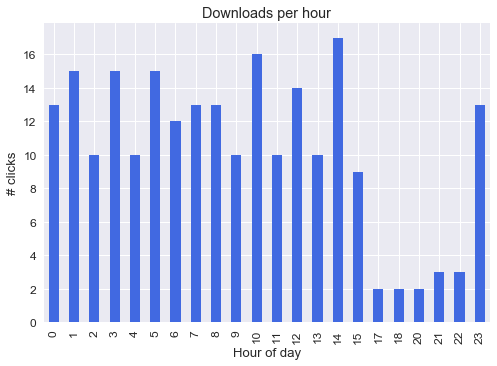

In [60]:
downloads_by_hour = train_sample[train_sample.is_attributed==1]['click_hour'].value_counts().sort_index()
ax = downloads_by_hour.plot.bar(color=['royalblue'])
ax.set_title('Downloads per hour')
ax.set(xlabel='Hour of day', ylabel='# downloads')

[Text(0,0.5,'ratio'), Text(0.5,0,'Hour of day')]

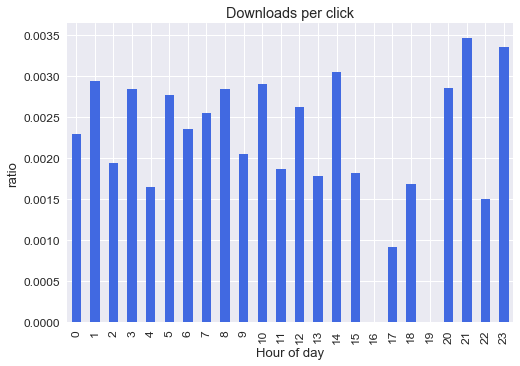

In [63]:
downloads_per_click_by_hour = downloads_by_hour/clicks_by_hour
ax = downloads_per_click_by_hour.plot.bar(color=['royalblue'])
ax.set_title('Downloads per click')
ax.set(xlabel='Hour of day', ylabel='ratio')

### Target feature

In [33]:
target_col = 'is_attributed'

In [37]:
train_sample[target_col].value_counts(normalize=True)

0    0.99773
1    0.00227
Name: is_attributed, dtype: float64

Target feature is highly imbalanced! Only around 0.2% clicks led to downloads.